# Fourier Transform and Traveling Salesman

### 1. FT - Rumori e Musica

La prima parte del compito richiedeva di analizzare lo spettro dei segnali mediante Trasformata di Fourier. Dei 3 file Dat forniti bisognava anche identificare la dipendenza dalla frequenza e il tipo di rumore corrispondente. Per poterlo fare sono stati in primis caricati i tre file. Poi sono state scelte le costanti legate alla trasformata dei segnali e scegliendo con attenzione l'array del segnale, sono state applicate le trasformate.
Infine per poter analizzare il tipo di rumore è stato costruito un grafico in funzione della frequenza.

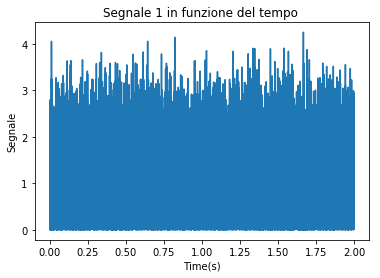

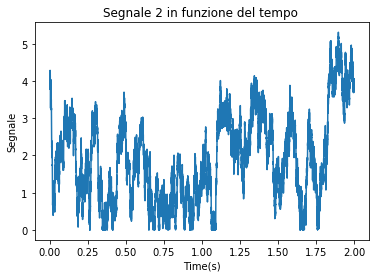

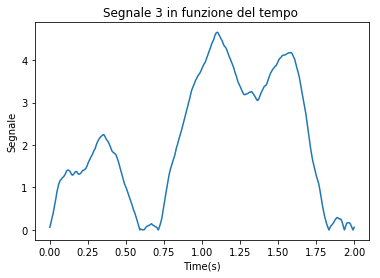

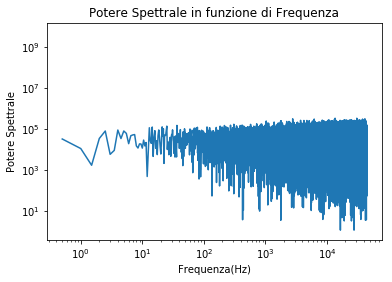

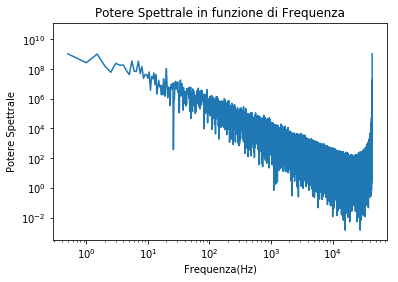

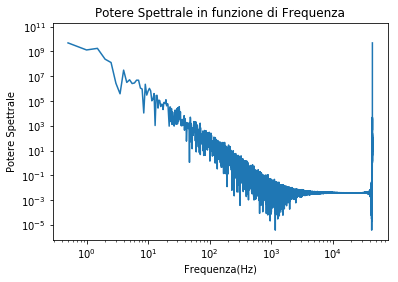

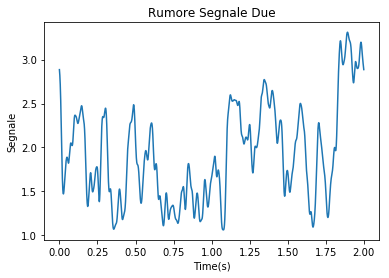

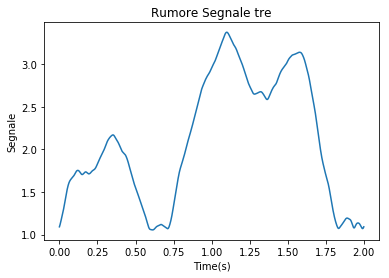

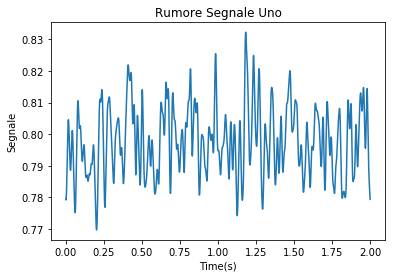

In [26]:
from numpy import *
from scipy import *
from matplotlib.pyplot import *
%matplotlib inline

uno = loadtxt('uno.DAT')    ##Caricamento file
due = loadtxt('due.DAT')
tre = loadtxt('tre.DAT')
N = len(uno)           ##Componenti della funzione
rate = 44100.      
tau=1./rate         ##Tempo di campionamento
T=N*tau           ##Periodo
sli=1             ##Punti per periodo

time=linspace(0,T,N)      
tslice=time[1:N:sli]        
unoslice=uno[1:N:sli]    ##Scelta Colonna File 1 
dueslice=due[1:N:sli]
treslice=tre[1:N:sli]
freq=arange(N/sli)/T       ##frequenza legata a trasformata


trasfu=fft(unoslice,N/sli)    ##Trasformata Suono 1

trasfd=fft(dueslice,N/sli)    ##Trasformata 2

trasft=fft(treslice,N/sli)    ###Trasformata Suono 3


figure(1)
plot(tslice,unoslice)
title('Segnale 1 in funzione del tempo ')
xlabel('Time(s)')
ylabel('Segnale')

figure(2)
plot(tslice,dueslice)
title('Segnale 2 in funzione del tempo ')
xlabel('Time(s)')
ylabel('Segnale')


figure(3)
plot(tslice,treslice)
title('Segnale 3 in funzione del tempo ')
xlabel('Time(s)')
ylabel('Segnale')

figure(4)
loglog(freq,abs(trasfu)**2)
title('Potere Spettrale in funzione di Frequenza')
xlabel('Frequenza(Hz)')
ylabel('Potere Spettrale')


figure(5)
loglog(freq,abs(trasfd)**2)
title('Potere Spettrale in funzione di Frequenza')
xlabel('Frequenza(Hz)')
ylabel('Potere Spettrale')

figure(6)
loglog(freq,abs(trasft)**2)
title('Potere Spettrale in funzione di Frequenza')
xlabel('Frequenza(Hz)')
ylabel('Potere Spettrale')
show()
             ##Aggiunta per analisi del rumore
freqtaglio=20                        ##frequenza di taglio del segnale
filtro=exp(-(freq**2)/(4*freqtaglio**2))     ##Gaussiana usata per costruzione filtro
 
filtrou=filtro*trasfu
filtrod=filtro*trasfd
filtrot=filtro*trasft
     ##
noiseu=ifft(filtrou)
noised=ifft(filtrod)
noiset=ifft(filtrot)

figure(7)
plot(time,noiseu)
title('Rumore Segnale Uno')
xlabel('Time(s)')
ylabel('Segnale')

figure(8)
plot(time,noised)
title('Rumore Segnale Due')
xlabel('Time(s)')
ylabel('Segnale')

figure(9)
plot(time,noiset)
title('Rumore Segnale tre')
xlabel('Time(s)')
ylabel('Segnale')
show()


Nei primi tre grafici possiamo notare come il periodo dei segnali dati sono diversi totalmente, anche le frequenze. Il primo segnale possiamo dire che è periodico, mentre il secondo e il terzo presentano dei picchi di segnale dopo un certo intervallo di tempo. Si può notare come nel grafico del rumore del segnale 2 nulla cambia.

Il secondo step consisteva nell'analisi di due file Musicali in formato WAV.L'analisi di questi due file è stata effettuata con la Trasformata di Fourier come nello step precedente. Per determinare il tipo di spettro di ruomore che più si avvicinava è stata scelta una frequenza di Taglio che, inserita in una gaussiana , ha permesso la costruzione del filtro. Il filtro ci ha permesso di contrassegnare le frequenze del segnale e riconoscere il tipo di spettro di rumore.

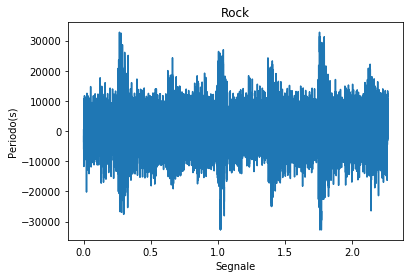

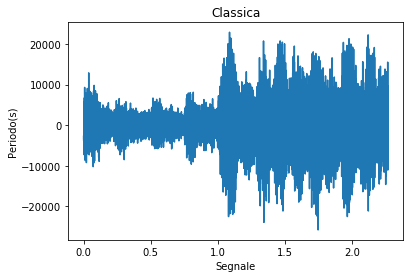

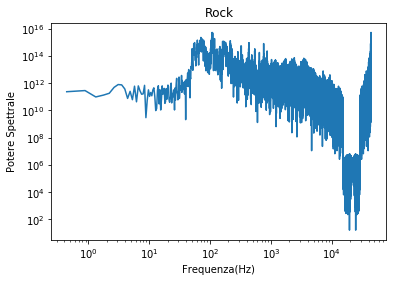

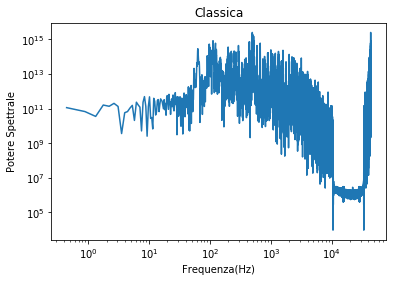

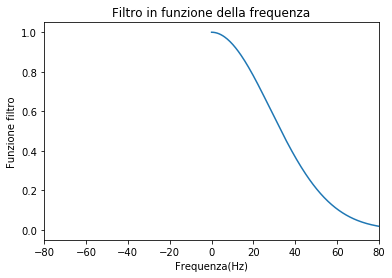

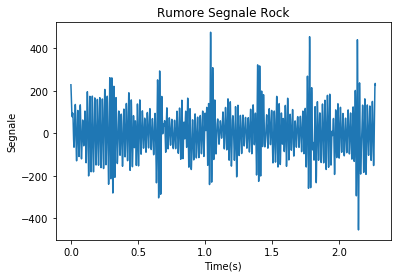

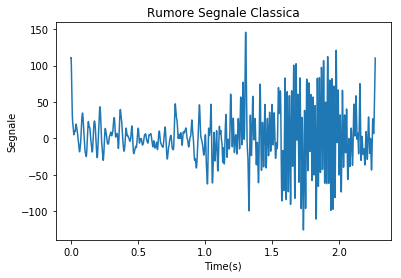

In [30]:
from numpy import *
from pylab import *
from matplotlib.pyplot import *
from scipy.io import wavfile        ##Funzione per importare file wav

dataC=wavfile.read ('classic_sample.wav')    ##Import Classica
dataR=wavfile.read ('rock_sample.wav')      ##Import Rock

datiC=dataC[1]                          ##Segnale in array
datiR=dataR[1]

datirock=datiR[:,0]                   ##Selezione della colonna di segnale
datiClassica=datiC[:,0]

N=len(datiR)                          ##Componenti della funzione
rate = 44100.    
tau=1./rate                           ##Costante tau trasformata
T=N*tau                           ## Periodo
time=linspace(0,T,N)
freq=arange(N)/T                    ##frequenza di campionamento 

freqtaglio=20                        ##frequenza di taglio del segnale
filtro=exp(-(freq**2)/(4*freqtaglio**2))     ##Gaussiana usata per costruzione filtro
 
      ##Trasformate dei Segnali
trasfrock=fft(datirock)
trasfclassic=fft(datiClassica)

     ##Filtro applicata allo spettro della trasformata del segnale
filtrorock=filtro*trasfrock
filtroclassic=filtro*trasfclassic
     ##Analisi della tipologia di ruomore
noiserock=ifft(filtrorock)
noiseclassic=ifft(filtroclassic)
     ##Sample del Suono
sample_noiserock=fft(noiserock)
sample_noiseclassic=fft(noiseclassic)
      
    ##Segnale in funzione del Tempo
figure(1)       
plot(time,datirock)
title('Rock')
xlabel('Segnale')
ylabel('Periodo(s)')
figure(2)
plot(time,datiClassica)
title('Classica')
xlabel('Segnale')
ylabel('Periodo(s)')

     ##Potere spettrale in funzione della frequenza
figure(3)
loglog(freq,abs(trasfrock)**2)
title('Rock')
ylabel('Potere Spettrale')
xlabel('Frequenza(Hz)')
figure(4)
loglog(freq,abs(trasfclassic)**2)
title('Classica')
ylabel('Potere Spettrale')
xlabel('Frequenza(Hz)')
show()
     ##Filtro in funzione della frequenza
figure(5)
plot(freq,filtro)
title('Filtro in funzione della frequenza')
xlabel('Frequenza(Hz)')
ylabel('Funzione filtro')
xlim(-80,80)
show()
   ###Grafici Rumore segnali in funzione del tempo
figure(6)
plot(time,noiserock)
title('Rumore Segnale Rock')
xlabel('Time(s)')
ylabel('Segnale')
figure(7)
plot(time,noiseclassic)
title('Rumore Segnale Classica')
xlabel('Time(s)')
ylabel('Segnale')
show()




# 2. Traveling Salesman

Il secondo punto dell'assignement era incentrato sul problema del commesso viaggiatore. Il problema essendo altamente non banale, è stato provato con 3 tipi di simulazioni: Swap Metropolis, Block Reverse e Prune and graft. Per fare questo sono state manipolate le liste di visita dei siti. Infine per poter analizzare i risultati è stato utilizzato il thermal schedule, e cioè un metodo grafico che ci permette di riportare il numero di passi fatti in funzione della temperatura.

### Swap Metropolis

iniziale: 26.6621946774


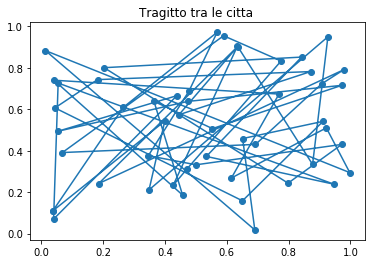

Temperatura 5.0 Percentuale di accettazione 0.964
Temperatura 4.0 Percentuale di accettazione 0.968
Temperatura 3.2 Percentuale di accettazione 0.952
Temperatura 2.56 Percentuale di accettazione 0.944
Temperatura 2.048 Percentuale di accettazione 0.908
Temperatura 1.6384 Percentuale di accettazione 0.918
Temperatura 1.31072 Percentuale di accettazione 0.88
Temperatura 1.048576 Percentuale di accettazione 0.876
Temperatura 0.8388608 Percentuale di accettazione 0.81
Temperatura 0.67108864 Percentuale di accettazione 0.762
Temperatura 0.536870912 Percentuale di accettazione 0.718
Temperatura 0.4294967296 Percentuale di accettazione 0.694
Temperatura 0.34359738368 Percentuale di accettazione 0.63
Temperatura 0.274877906944 Percentuale di accettazione 0.558
Temperatura 0.219902325555 Percentuale di accettazione 0.492
Temperatura 0.175921860444 Percentuale di accettazione 0.472
Temperatura 0.140737488355 Percentuale di accettazione 0.276
Temperatura 0.112589990684 Percentuale di accettazione

C:\Users\Loi Family\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


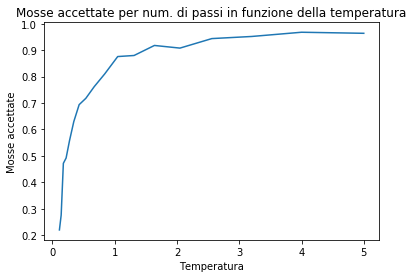

corrente: 17.6561871293 , iter: 1


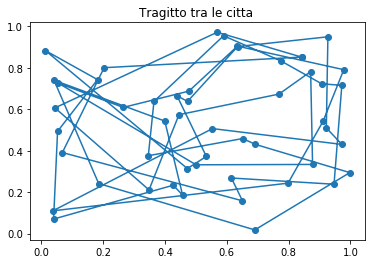

corrente: 17.6561871293 , iter: 2


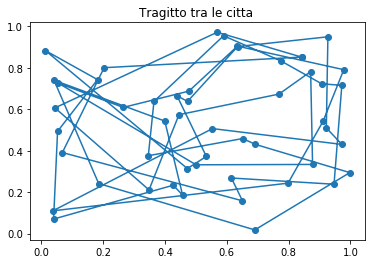

corrente: 17.6561871293 , iter: 3


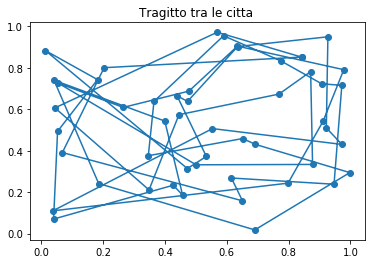

corrente: 17.6561871293 , iter: 4


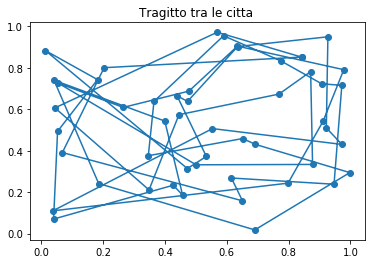

corrente: 17.6561871293 , iter: 5


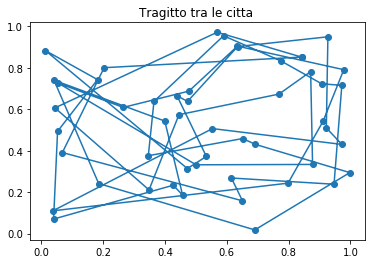

Distanza finale: 17.6561871293


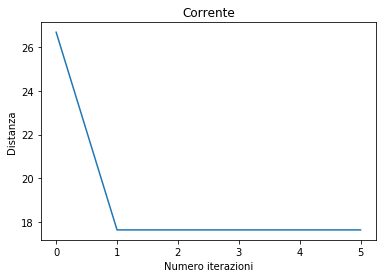

Rapporto tra cammino minimo e cammino massimo in percentuale 66.2218071055


In [1]:
from pylab import *

def setup():
# crea un set di punti a caso con coordinate tra 0 e 1
# e una lista di visita, inizialmente ordinata
    global N, city, lista
    lista=range(N)
    for i in range(N):
        for j in (0,1):
            city[j][i]=rand()

def lung():
# calcola le lunghezze euclidee tra ogni punto nella 
# lista e il successivo e le somma tutte
    global N,city,lista
    leng=0.
    for i in range(N):
        dum=0.;
        for icoo in (0,1):
            iloc1=int(lista[i])
            iloc2=int(lista[i-1])
            dum+=(city[icoo][iloc1]-city[icoo][iloc2])**2
        leng+=sqrt(dum)
    return leng

def anneal():
#calando T di un fattore alpha ogni nstep
#cambia la lunghezza della lista per scambio
#accettaando alla metropolis
    global N, city, lista, alpha, T, Tem, accept
    old=lung() 
    Tem=[]
    accept=[]
    T_min = 0.1
    nstep=500
    while T > T_min:
        seed(); acce=0; ii=0
        while ii <= nstep:       ##Ciclo sui passi
            ii+=1
            ir=int(N*rand())         # sito a caso
            swap(ir,ir+1) #mossa            
            new=lung()
            if exp(-(new-old)/T) > rand():     ## Metropolis Condizione
                old=new
                acce+=1
            else:
                swap(ir+1,ir) #mossa inversa, se rifiutata
            pat.append(new)
        print 'Temperatura',T,'Percentuale di accettazione',float(acce)/nstep
        Tem.append(T)
        accept.append (float(acce)/nstep)       
        if acce==0: break
        T = T*alpha
        
def conf():     ##Viene definito il metodo di Thermal Schedule
    global Tem, accept 
    figure(1)  
    plot(Tem,accept)
    title('Mosse accettate per num. di passi in funzione della temperatura')
    xlabel('Temperatura')
    ylabel('Mosse accettate')
    legend()
    show ()

def swap(i,j):
#scambia l'ordine di visita
#di due punti adiacenti nella 
#lista
    global N, city, lista
    i=i%N; j=j%N
    salva=lista[i]
    lista[i]=lista[j] 
    lista[j]=salva


def plpath():
#plot del percorso richiuso su se stesso
    global city,N,lista
    dump=zeros((2,N+1))
    for k in range(N):
        for i in (0,1):
            dump[i][k]=city[i][lista[k]]
    dump[0][N]=city[0][lista[0]]
    dump[1][N]=city[1][lista[0]]
    figure()
    plot (dump[0],dump[1],'o-')
    title('Tragitto tra le citta ')
    show()
    
# main; alcune iterazioni; disegna la lunghezza vs iter
##Vengono riportare le setup
global N, city, lista, alpha, T ,accept
N=50; city=zeros((2,N))       #àNumero di passi e definizione lista per città
lista=range(N)
for i in range(N):       ##Ciclo per passi random
    for j in (0,1):
        city[j][i]=rand()
        


iniziale=lung(); print 'iniziale:',iniziale
iter=5
corrente=[iniziale]
plpath()
T=5.;alpha=0.8
pat=[0]
for ii in range(iter):
    anneal()
    if ii==0:
        conf()
    corrente.append(lung())
    print 'corrente:',corrente[ii+1],', iter:',ii+1
    plpath()
if iter>1:
    figure(2)
    title('Corrente')
    xlabel('Numero iterazioni')
    ylabel('Distanza')
    plot(corrente)
print 'Distanza finale:',corrente[-1]
show()

print 'Rapporto tra cammino minimo e cammino massimo in percentuale',(min(corrente)/max(corrente))*100


### Swap discesa

iniziale: 24.3739327065


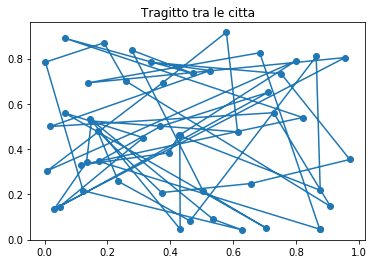

Temperatura 5.0 Percentuale di accettazione 0.038
Temperatura 4.0 Percentuale di accettazione 0.0


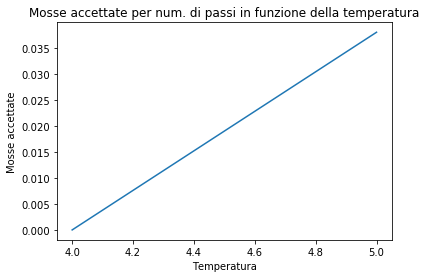

corrente: 20.4732663741 , iter: 1


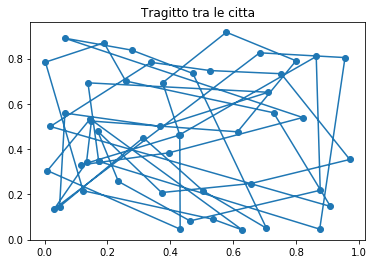

Temperatura 4.0 Percentuale di accettazione 0.0
corrente: 20.4732663741 , iter: 2


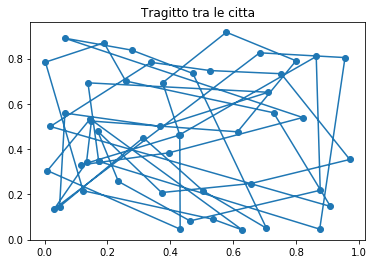

Temperatura 4.0 Percentuale di accettazione 0.0
corrente: 20.4732663741 , iter: 3


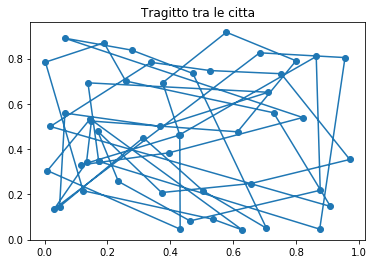

Temperatura 4.0 Percentuale di accettazione 0.0
corrente: 20.4732663741 , iter: 4


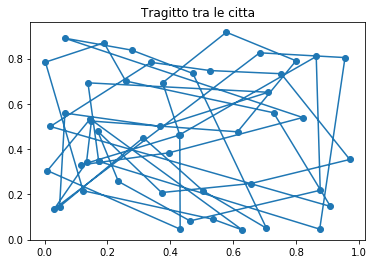

Temperatura 4.0 Percentuale di accettazione 0.0
corrente: 20.4732663741 , iter: 5


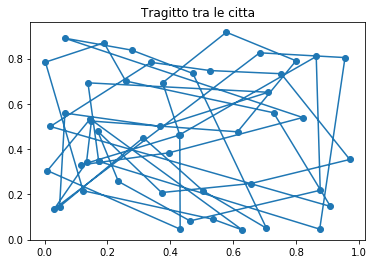

Distanza finale: 20.4732663741


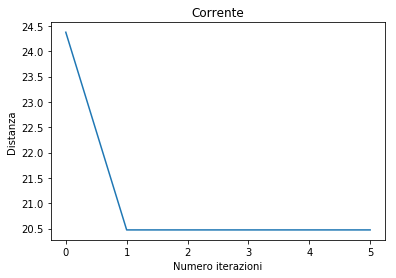

Rapporto tra cammino minimo e cammino massimo in percentuale 83.9965655956


In [2]:
from pylab import *

def setup():
# crea un set di punti a caso con coordinate tra 0 e 1
# e una lista di visita, inizialmente ordinata
    global N, city, lista
    lista=range(N)
    for i in range(N):
        for j in (0,1):
            city[j][i]=rand()

def lung():
# calcola le lunghezze euclidee tra ogni punto nella 
# lista e il successivo e le somma tutte
    global N,city,lista
    leng=0.
    for i in range(N):
        dum=0.;
        for icoo in (0,1):
            iloc1=int(lista[i])
            iloc2=int(lista[i-1])
            dum+=(city[icoo][iloc1]-city[icoo][iloc2])**2
        leng+=sqrt(dum)
    return leng

def anneal():
#calando T di un fattore alpha ogni nstep
#cambia la lunghezza della lista per scambio
#accettaando alla metropolis
    global N, city, lista, alpha, T, Tem, accept
    old=lung() 
    Tem=[]
    accept=[]
    T_min = 0.1#0.00001
    nstep=500
    while T > T_min:
        seed(); acce=0; ii=0
        while ii <= nstep:
            ii+=1
            ir=int(N*rand())         # sito a caso
            swap(ir,ir+1) #mossa            
            new=lung()
            if (new-old)<0:         ###Ciclo if con condizione di discesa
                old=new
                acce+=1
            else:
                swap(ir+1,ir) #mossa inversa, se rifiutata
            pat.append(new)
        print 'Temperatura',T,'Percentuale di accettazione',float(acce)/nstep
        accept.append (float(acce)/nstep)
        Tem.append(T)
        if acce==0: break
        T = T*alpha
        
def conf():
    global Tem, accept
    figure(1)
    plot(Tem,accept)
    title('Mosse accettate per num. di passi in funzione della temperatura')
    xlabel('Temperatura')
    ylabel('Mosse accettate')
    legend()
    show ()

def swap(i,j):
#scambia l'ordine di visita
#di due punti adiacenti nella 
#lista
    global N, city, lista
    i=i%N; j=j%N
    salva=lista[i]
    lista[i]=lista[j] 
    lista[j]=salva


def plpath():
#plot del percorso richiuso su se stesso
    global city,N,lista
    dump=zeros((2,N+1))
    for k in range(N):
        for i in (0,1):
            dump[i][k]=city[i][lista[k]]
    dump[0][N]=city[0][lista[0]]
    dump[1][N]=city[1][lista[0]]
    figure()
    plot (dump[0],dump[1],'o-')
    title('Tragitto tra le citta')
    show()
    
# main; alcune iterazioni; disegna la lunghezza vs iter
global N, city, lista, alpha, T ,accept
N=50; city=zeros((2,N))
lista=range(N)
for i in range(N):
    for j in (0,1):
        city[j][i]=rand()
        


iniziale=lung(); print 'iniziale:',iniziale
iter=5
corrente=[iniziale]
plpath()
T=5.;alpha=0.8
pat=[0]
for ii in range(iter):
    anneal()
    if ii==0:
        conf()
    corrente.append(lung())
    print 'corrente:',corrente[ii+1],', iter:',ii+1
    plpath()
if iter>1:
    figure(2)
    title('Corrente')
    xlabel('Numero iterazioni')
    ylabel('Distanza')
    plot(corrente)
print 'Distanza finale:',corrente[-1]
show()

print 'Rapporto tra cammino minimo e cammino massimo in percentuale',(min(corrente)/max(corrente))*100

### Block Reverse (Metropolis)


iniziale: 25.5052357949


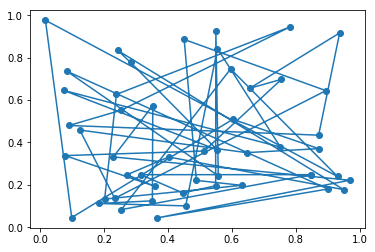

Temperatura 5.0 Percentuale di accettazione 0.972
Temperatura 4.0 Percentuale di accettazione 0.96
Temperatura 3.2 Percentuale di accettazione 0.962
Temperatura 2.56 Percentuale di accettazione 0.95
Temperatura 2.048 Percentuale di accettazione 0.926
Temperatura 1.6384 Percentuale di accettazione 0.916
Temperatura 1.31072 Percentuale di accettazione 0.9
Temperatura 1.048576 Percentuale di accettazione 0.842
Temperatura 0.8388608 Percentuale di accettazione 0.826
Temperatura 0.67108864 Percentuale di accettazione 0.79
Temperatura 0.536870912 Percentuale di accettazione 0.724
Temperatura 0.4294967296 Percentuale di accettazione 0.644
Temperatura 0.34359738368 Percentuale di accettazione 0.53
Temperatura 0.274877906944 Percentuale di accettazione 0.51
Temperatura 0.219902325555 Percentuale di accettazione 0.412
Temperatura 0.175921860444 Percentuale di accettazione 0.336
Temperatura 0.140737488355 Percentuale di accettazione 0.294
Temperatura 0.112589990684 Percentuale di accettazione 0.2

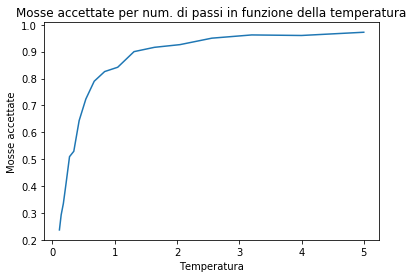

corrente: 11.8313953233 , iter: 1


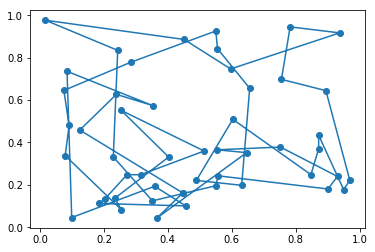

corrente: 11.8313953233 , iter: 2


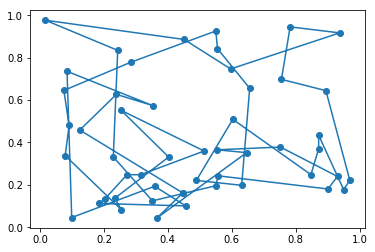

corrente: 11.8313953233 , iter: 3


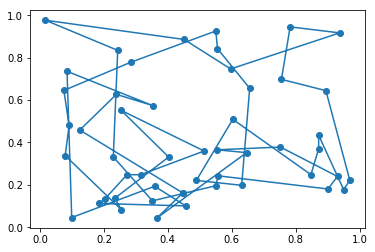

corrente: 11.8313953233 , iter: 4


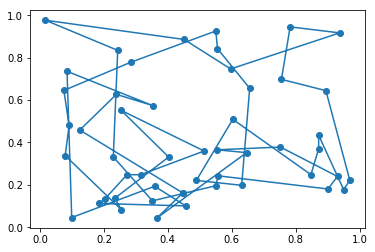

corrente: 11.8313953233 , iter: 5


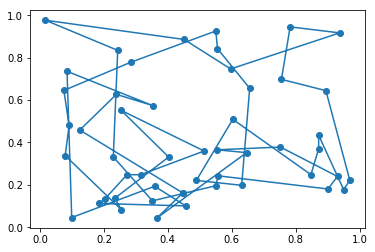

Distanza finale: 11.8313953233


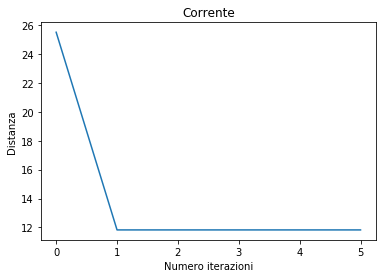

Rapporto tra cammino minimo e cammino massimo in percentuale 46.388104068


In [3]:
from pylab import *
                         ##block reverse
def lung():
    global N,city,lista
    leng=0.
    for i in range(N):
        dum=0.;
        for icoo in (0,1):
            iloc1=int(lista[i])
            iloc2=int(lista[i-1])
            dum+=(city[icoo][iloc1]-city[icoo][iloc2])**2
        leng+=sqrt(dum)
    return leng

def reverse(ir,ig):       ## definizione del reverse della matrice 
    global lista, dum
    j=max(ir,ig)
    i=min(ir,ig)
    dum=lista[i:j+1]
    lista[i:j+1]=dum[::-1]
    
    
def anneal():                             ###Ciclo di Block Reverse con Metropolis
    global N, city, lista, alpha, T , accept , Tem
    old=lung()
    Tem=[]
    accept=[]
    T_min = 0.1#0.00001
    nstep=500
    while T > T_min:
        seed(); acce=0; ii=0
        while ii <= nstep:
            ii+=1
            ir=int(N*rand())
            ig=int(N*rand())
            reverse(ir,ig)    
            new=lung()
            if exp(-(new-old)/T) > rand():
                old=new
                acce+=1
                new=lung()
            else:
                reverse(ig,ir)
            pat.append(new)
        print 'Temperatura',T,'Percentuale di accettazione',float(acce)/nstep
        accept.append (float(acce)/nstep)
        Tem.append(T)
        if acce==0: break
        T = T*alpha
                
def conf():                       ##def confronto
    global Tem, accept
    figure(1)
    plot(Tem,accept)
    title('Mosse accettate per num. di passi in funzione della temperatura')
    xlabel('Temperatura')
    ylabel('Mosse accettate')
    legend()
    show ()     
        


def plpath():
    global city,N,lista
    dump=zeros((2,N+1))
    for k in range(N):
        for i in (0,1):
            dump[i][k]=city[i][lista[k]]
    dump[0][N]=city[0][lista[0]]
    dump[1][N]=city[1][lista[0]]
    plot (dump[0],dump[1],'o-')
    show()

global N, city, lista, alpha, T
N=50; city=zeros((2,N))
lista=range(N)
for i in range(N):
    for j in (0,1):
        city[j][i]=rand()
        
iniziale=lung(); print 'iniziale:',iniziale
iter=5
corrente=[iniziale]
plpath()
T=5.;alpha=0.8
pat=[0]
for ii in range(iter):
    anneal()
    if ii==0:
        conf()
    corrente.append(lung())
    print 'corrente:',corrente[ii+1],', iter:',ii+1
    plpath()
if iter>1:
    figure(2)
    title('Corrente')
    xlabel('Numero iterazioni')
    ylabel('Distanza')
    plot(corrente)
print 'Distanza finale:',corrente[-1]
show()

print 'Rapporto tra cammino minimo e cammino massimo in percentuale',(min(corrente)/max(corrente))*100



### Block Reverse (DiscesA)

iniziale: 23.763247934


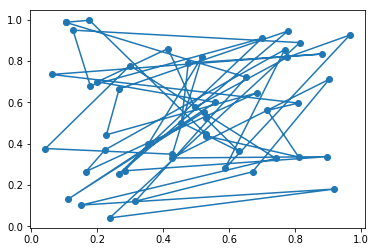

Temperatura 5.0 Percentuale di accettazione 0.146
Temperatura 4.0 Percentuale di accettazione 0.036
Temperatura 3.2 Percentuale di accettazione 0.024
Temperatura 2.56 Percentuale di accettazione 0.014
Temperatura 2.048 Percentuale di accettazione 0.008
Temperatura 1.6384 Percentuale di accettazione 0.01
Temperatura 1.31072 Percentuale di accettazione 0.01
Temperatura 1.048576 Percentuale di accettazione 0.0


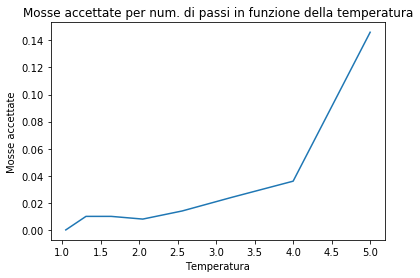

corrente: 6.39074833173 , iter: 1


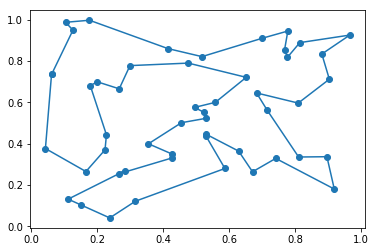

Temperatura 1.048576 Percentuale di accettazione 0.002
Temperatura 0.8388608 Percentuale di accettazione 0.0
corrente: 6.34763719168 , iter: 2


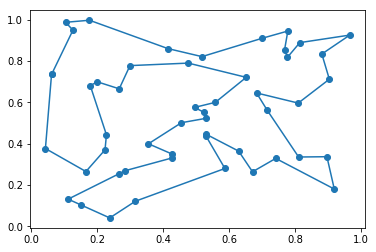

Temperatura 0.8388608 Percentuale di accettazione 0.0
corrente: 6.34763719168 , iter: 3


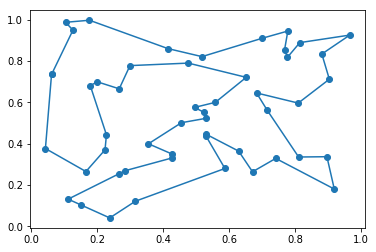

Temperatura 0.8388608 Percentuale di accettazione 0.0
corrente: 6.34763719168 , iter: 4


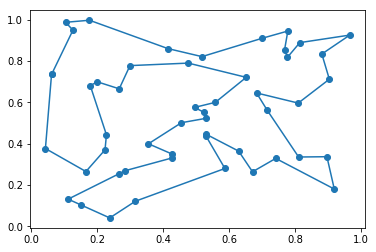

Temperatura 0.8388608 Percentuale di accettazione 0.0
corrente: 6.34763719168 , iter: 5


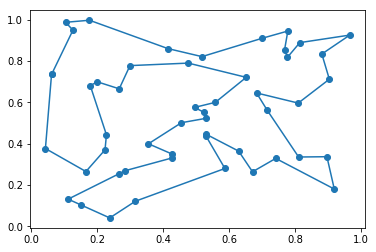

Distanza finale: 6.34763719168


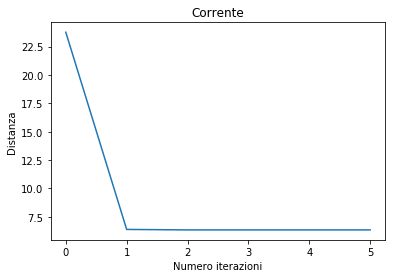

Rapporto tra cammino minimo e cammino massimo in percentuale 26.7119932818


In [4]:
from pylab import *
                         ##block reverse
def lung():
    global N,city,lista
    leng=0.
    for i in range(N):
        dum=0.;
        for icoo in (0,1):
            iloc1=int(lista[i])
            iloc2=int(lista[i-1])
            dum+=(city[icoo][iloc1]-city[icoo][iloc2])**2
        leng+=sqrt(dum)
    return leng

def reverse(ir,ig):
    global lista, dum
    j=max(ir,ig)
    i=min(ir,ig)
    dum=lista[i:j+1]
    lista[i:j+1]=dum[::-1]
    
    
def anneal():
#calando T di un fattore alpha ogni nstep
#cambia la lunghezza della lista per scambio
#accettaando alla metropolis
    global N, city, lista, alpha, T, Tem, accept
    old=lung() 
    Tem=[]
    accept=[]
    T_min = 0.1#0.00001
    nstep=500
    while T > T_min:
        seed(); acce=0; ii=0
        while ii <= nstep:
            ii+=1
            ir=int(N*rand())         # sito a caso
            ig=int(N*rand())
            reverse(ir,ig)
            new=lung()
            if (new-old)<0:
                old=new
                acce+=1
            else:
                reverse(ig,ir)
            pat.append(new)
        print 'Temperatura',T,'Percentuale di accettazione',float(acce)/nstep
        accept.append (float(acce)/nstep)
        Tem.append(T)
        if acce==0: break
        T = T*alpha
                
def conf():
    global Tem, accept
    figure(1)
    plot(Tem,accept)
    title('Mosse accettate per num. di passi in funzione della temperatura')
    xlabel('Temperatura')
    ylabel('Mosse accettate')
    legend()
    show ()     
        


def plpath():
    global city,N,lista
    dump=zeros((2,N+1))
    for k in range(N):
        for i in (0,1):
            dump[i][k]=city[i][lista[k]]
    dump[0][N]=city[0][lista[0]]
    dump[1][N]=city[1][lista[0]]
    plot (dump[0],dump[1],'o-')
    show()

global N, city, lista, alpha, T
N=50; city=zeros((2,N))
lista=range(N)
for i in range(N):
    for j in (0,1):
        city[j][i]=rand()
        
iniziale=lung(); print 'iniziale:',iniziale
iter=5
corrente=[iniziale]
plpath()
T=5.;alpha=0.8
pat=[0]
for ii in range(iter):
    anneal()
    if ii==0:
        conf()
    corrente.append(lung())
    print 'corrente:',corrente[ii+1],', iter:',ii+1
    plpath()
if iter>1:
    figure(2)
    title('Corrente')
    xlabel('Numero iterazioni')
    ylabel('Distanza')
    plot(corrente)
print 'Distanza finale:',corrente[-1]
show()

print 'Rapporto tra cammino minimo e cammino massimo in percentuale',(min(corrente)/max(corrente))*100


### Prune and Graft (Metropolis)

Per l pota e innesta viene definito il ciclo che ci permette di tagliare un intervallo di valori compresi tra due indici generici i e j; e definendo una seconda parte che verrà indicata con k, verrà potata la parte i e j e verrà inserita la parte k. 

iniziale: 25.9731334453


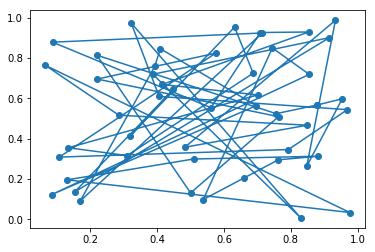

Temperatura 5.0 Percentuale di accettazione 0.954
Temperatura 4.0 Percentuale di accettazione 0.96
Temperatura 3.2 Percentuale di accettazione 0.94
Temperatura 2.56 Percentuale di accettazione 0.932
Temperatura 2.048 Percentuale di accettazione 0.928
Temperatura 1.6384 Percentuale di accettazione 0.898
Temperatura 1.31072 Percentuale di accettazione 0.848
Temperatura 1.048576 Percentuale di accettazione 0.858
Temperatura 0.8388608 Percentuale di accettazione 0.772
Temperatura 0.67108864 Percentuale di accettazione 0.726
Temperatura 0.536870912 Percentuale di accettazione 0.658
Temperatura 0.4294967296 Percentuale di accettazione 0.602
Temperatura 0.34359738368 Percentuale di accettazione 0.414
Temperatura 0.274877906944 Percentuale di accettazione 0.324
Temperatura 0.219902325555 Percentuale di accettazione 0.308
Temperatura 0.175921860444 Percentuale di accettazione 0.264
Temperatura 0.140737488355 Percentuale di accettazione 0.154
Temperatura 0.112589990684 Percentuale di accettazion

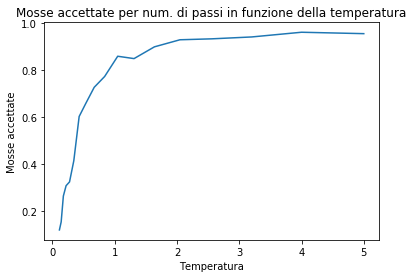

corrente: 11.7529953362 , iter: 1


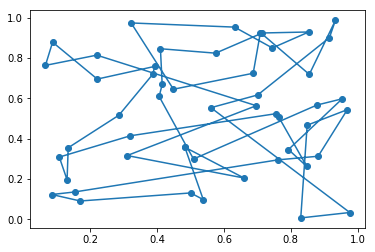

corrente: 11.7529953362 , iter: 2


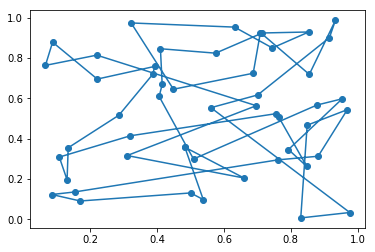

corrente: 11.7529953362 , iter: 3


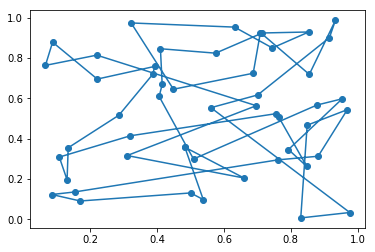

corrente: 11.7529953362 , iter: 4


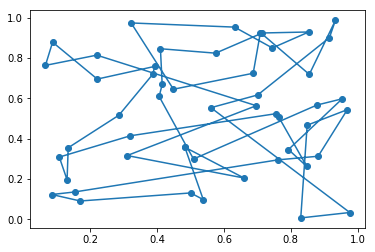

corrente: 11.7529953362 , iter: 5


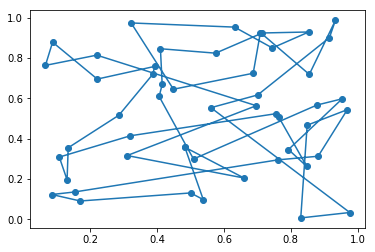

Distanza finale: 11.7529953362


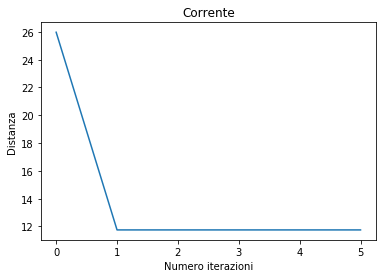

Rapporto tra cammino minimo e cammino massimo in percentuale 45.2505869612


In [5]:
from pylab import *
                         ##block reverse
def lung():
    global N,city,lista
    leng=0.
    for i in range(N):
        dum=0.;
        for icoo in (0,1):
            iloc1=int(lista[i])
            iloc2=int(lista[i-1])
            dum+=(city[icoo][iloc1]-city[icoo][iloc2])**2
        leng+=sqrt(dum)
    return leng

def potainnesta(ir,ig,ih):      ##Visita liste per prune and graft 
    global lista, dum
    j=max(ir,ig)
    i=min(ir,ig)
    k=ih
    if k>i and k<j:
        a=lista[0:i]
        b=lista[j:N]
        dum=b+a
        dum=dum[::-1]
        for m in range (len(dum)):
            lista.insert(k+m,dum[m])
        del lista[j+len(dum):N+len(dum)]
        del lista[0:i]
    if k<=i:
        dum=lista[i:j]
        for m in range (len(dum)):
            lista.insert(k+m,dum[m])
        del lista[i+len(dum):j+len(dum)]


    if k>=j:
        dum=lista[i:j]
        for m in range(len(dum)):
            lista.insert(k+m,dum[m])
        del lista [i:j]

    
      
def anneal():                             ##pota e innesta con condizione in salita
    global N, city, lista, alpha, T, Tem, accept
    old=lung()
    Tem=[]
    accept=[]
    T_min = 0.1#0.00001
    nstep=500
    while T > T_min:
        seed(); acce=0; ii=0
        while ii <= nstep:
            ii+=1
            ir=int(N*rand())
            ig=int(N*rand())
            k=int(N*rand())
            save=[]
            for p in range(N):
                save.append(lista[p])
            potainnesta(ir,ig,k)
            new=lung()
            if exp(-(new-old)/T) > rand():
                old=new
                acce+=1
                new=lung()
            else:
                lista=save
            pat.append(new)
        print 'Temperatura',T,'Percentuale di accettazione',float(acce)/nstep
        accept.append (float(acce)/nstep)
        Tem.append(T)
        if acce==0: break
        T = T*alpha

def conf():
    global Tem, accept
    figure(1)
    plot(Tem,accept)
    title('Mosse accettate per num. di passi in funzione della temperatura')
    xlabel('Temperatura')
    ylabel('Mosse accettate')
    legend()
    show ()  

def plpath():
    global city,N,lista
    dump=zeros((2,N+1))
    for k in range(N):
        for i in (0,1):
            dump[i][k]=city[i][lista[k]]
    dump[0][N]=city[0][lista[0]]
    dump[1][N]=city[1][lista[0]]
    plot (dump[0],dump[1],'o-')
    show()

global N, city, lista, alpha, T
N=50; city=zeros((2,N))
lista=range(N)
for i in range(N):
    for j in (0,1):
        city[j][i]=rand()

iniziale=lung(); print 'iniziale:',iniziale
iter=5
corrente=[iniziale]
plpath()
T=5.;alpha=0.8
pat=[0]
for ii in range(iter):
    anneal()
    if ii==0:
        conf()
    corrente.append(lung())
    print 'corrente:',corrente[ii+1],', iter:',ii+1
    plpath()
if iter>1:
    figure(2)
    title('Corrente')
    xlabel('Numero iterazioni')
    ylabel('Distanza')
    plot(corrente)
print 'Distanza finale:',corrente[-1]
show()

print 'Rapporto tra cammino minimo e cammino massimo in percentuale',(min(corrente)/max(corrente))*100


### Prune and graft discesa

iniziale: 20.8488309778


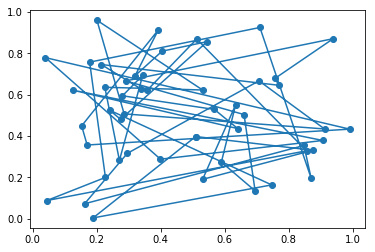

Temperatura 5.0 Percentuale di accettazione 0.144
Temperatura 4.0 Percentuale di accettazione 0.068
Temperatura 3.2 Percentuale di accettazione 0.074
Temperatura 2.56 Percentuale di accettazione 0.072
Temperatura 2.048 Percentuale di accettazione 0.058
Temperatura 1.6384 Percentuale di accettazione 0.06
Temperatura 1.31072 Percentuale di accettazione 0.062
Temperatura 1.048576 Percentuale di accettazione 0.086
Temperatura 0.8388608 Percentuale di accettazione 0.07
Temperatura 0.67108864 Percentuale di accettazione 0.062
Temperatura 0.536870912 Percentuale di accettazione 0.056
Temperatura 0.4294967296 Percentuale di accettazione 0.058
Temperatura 0.34359738368 Percentuale di accettazione 0.066
Temperatura 0.274877906944 Percentuale di accettazione 0.054
Temperatura 0.219902325555 Percentuale di accettazione 0.07
Temperatura 0.175921860444 Percentuale di accettazione 0.058
Temperatura 0.140737488355 Percentuale di accettazione 0.064
Temperatura 0.112589990684 Percentuale di accettazione

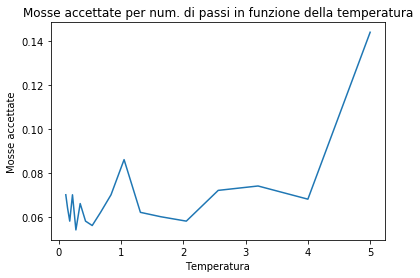

corrente: 6.53949370277 , iter: 1


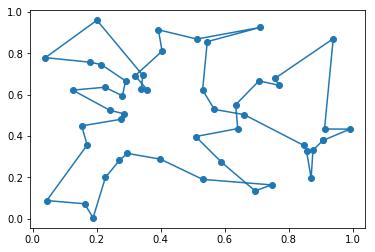

corrente: 6.53949370277 , iter: 2


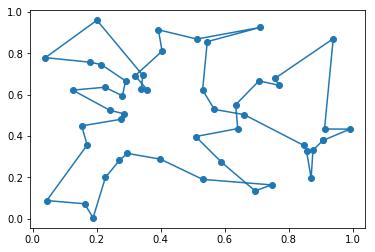

corrente: 6.53949370277 , iter: 3


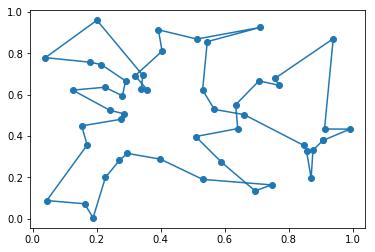

corrente: 6.53949370277 , iter: 4


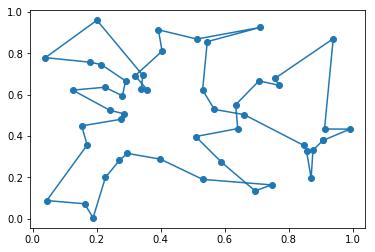

corrente: 6.53949370277 , iter: 5


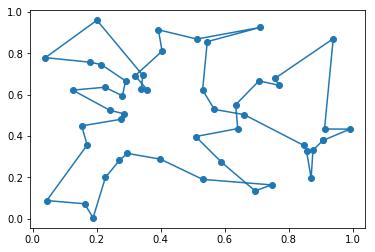

Distanza finale: 6.53949370277


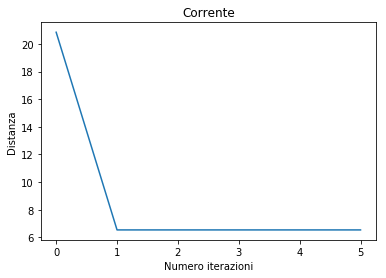

Rapporto tra cammino minimo e cammino massimo in percentuale 31.3662368395


In [18]:
from pylab import *
                         ##block reverse
def lung():
    global N,city,lista
    leng=0.
    for i in range(N):
        dum=0.;
        for icoo in (0,1):
            iloc1=int(lista[i])
            iloc2=int(lista[i-1])
            dum+=(city[icoo][iloc1]-city[icoo][iloc2])**2
        leng+=sqrt(dum)
    return leng

def potainnesta(ir,ig,ih):
    global lista, dum
    j=max(ir,ig)
    i=min(ir,ig)
    k=ih
    if k>i and k<j:
        a=lista[0:i]
        b=lista[j:N]
        dum=b+a
        dum=dum[::-1]
        for m in range (len(dum)):
            lista.insert(k+m,dum[m])
        del lista[j+len(dum):N+len(dum)]
        del lista[0:i]
    if k<=i:
        dum=lista[i:j]
        for m in range (len(dum)):
            lista.insert(k+m,dum[m])
        del lista[i+len(dum):j+len(dum)]


    if k>=j:
        dum=lista[i:j]
        for m in range(len(dum)):
            lista.insert(k+m,dum[m])
        del lista [i:j]

    
      
def anneal():
    global N, city, lista, alpha, T, Tem, accept
    old=lung()
    Tem=[]
    accept=[]
    T_min = 0.1#0.00001
    nstep=500
    while T > T_min:
        seed(); acce=0; ii=0
        while ii <= nstep:
            ii+=1
            ir=int(N*rand())
            ig=int(N*rand())
            k=int(N*rand())
            save=[]
            for p in range(N):
                save.append(lista[p])
            potainnesta(ir,ig,k)
            new=lung()
            if (new-old)<=0:
                old=new
                acce+=1
                new=lung()
            else:
                lista=save
            pat.append(new)
        print 'Temperatura',T,'Percentuale di accettazione',float(acce)/nstep
        accept.append (float(acce)/nstep)
        Tem.append(T)
        if acce==0: break
        T = T*alpha

def conf():
    global Tem, accept
    figure(1)
    plot(Tem,accept)
    title('Mosse accettate per num. di passi in funzione della temperatura')
    xlabel('Temperatura')
    ylabel('Mosse accettate')
    legend()
    show ()  

def plpath():
    global city,N,lista
    dump=zeros((2,N+1))
    for k in range(N):
        for i in (0,1):
            dump[i][k]=city[i][lista[k]]
    dump[0][N]=city[0][lista[0]]
    dump[1][N]=city[1][lista[0]]
    plot (dump[0],dump[1],'o-')
    show()

global N, city, lista, alpha, T
N=50; city=zeros((2,N))
lista=range(N)
for i in range(N):
    for j in (0,1):
        city[j][i]=rand()

iniziale=lung(); print 'iniziale:',iniziale
iter=5
corrente=[iniziale]
plpath()
T=5.;alpha=0.8
pat=[0]
for ii in range(iter):
    anneal()
    if ii==0:
        conf()
    corrente.append(lung())
    print 'corrente:',corrente[ii+1],', iter:',ii+1
    plpath()
if iter>1:
    figure(2)
    title('Corrente')
    xlabel('Numero iterazioni')
    ylabel('Distanza')
    plot(corrente)
print 'Distanza finale:',corrente[-1]
show()

print 'Rapporto tra cammino minimo e cammino massimo in percentuale',(min(corrente)/max(corrente))*100


# Pota e Innesta liste

In [7]:
from numpy import*
from pylab import*

N=10
lista=linspace(0,9,N)
print 'lista',lista
ir=int(N*rand())
ig=int(N*rand())
i=max(ir,ig)
j=min(ir,ig)
k=int(N*rand())
while k==i or k==j: break
else:
    print 'i',i,'', 'j',j,'' ,'k',k
    
if k>j and k<i:
    print 'j<k<i'
    dum1=lista[0:j+1]
    dum2=lista[j+1:k+1]
    dum3=lista[k+1:i+1]
    dum4=lista[i+1:N+1]
    print 'dum1',dum1
    print 'dum2',dum2
    print 'dum3',dum3
    print 'dum4',dum4
    
    print ''
    print 'pota e innesta'
    print ''
    
    dum3=lista[j+1:k+1]
    dum2=lista[k+1:i+1]
    print 'dum1',dum1
    print 'dum2',dum2
    print 'dum3',dum3
    print 'dum4',dum4
    
if k<=j:
    print'k<j'
    dum1=lista[0:k+1]
    dum2=lista[k+1:j+1]
    dum3=lista[j+1:i+1]
    dum4=lista[i+1:N+1]
    print 'dum1',dum1
    print 'dum2',dum2
    print 'dum3',dum3
    print 'dum4',dum4
    
    print'pota e innesta'
    
    dum3=lista[k+1:j+1]
    dum2=lista[j+1:i+1]
    print 'dum1',dum1
    print 'dum2',dum2
    print 'dum3',dum3
    print 'dum4',dum4
    
if k>=i:
    print 'k>i'
    print'k<j'
    dum1=lista[0:j+1]
    dum2=lista[j+1:i+1]
    dum3=lista[i+1:k+1]
    dum4=lista[k+1:N+1]
    print 'dum1',dum1
    print 'dum2',dum2
    print 'dum3',dum3
    print 'dum4',dum4
    
    print'pota e innesta'
    
    dum3=lista[j+1:i+1]
    dum2=lista[i+1:k+1]
    print 'dum1',dum1
    print 'dum2',dum2
    print 'dum3',dum3
    print 'dum4',dum4
    
    
    

    
    
    
    
    
    

lista [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
i 8  j 2  k 3
j<k<i
dum1 [ 0.  1.  2.]
dum2 [ 3.]
dum3 [ 4.  5.  6.  7.  8.]
dum4 [ 9.]

pota e innesta

dum1 [ 0.  1.  2.]
dum2 [ 4.  5.  6.  7.  8.]
dum3 [ 3.]
dum4 [ 9.]
